<a href="https://colab.research.google.com/github/Vkrisn/MLE/blob/main/V_First_Program_Nirmala_Classification_Assignment_0308_JPMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [ ]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("\n Numpy: " + np.__version__)
print("\n sklearn: " + sklearn.__version__)


 Numpy: 1.22.4

 sklearn: 1.2.1


In [ ]:
## Load data
df = pd.read_csv("./heart disease classification dataset.csv")
%time
df.head(5)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 9.3 µs


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
%timeit
# Show size of the dataset
print("Rows and Columns: \n", df.shape, "\n")
print("General Information: \n", df.info(), "\n")
# b) Validate and change all data types
print(df.dtypes)
 

Rows and Columns: 
 (303, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB
General Information: 
 None 

Unnamed: 0      int64
age             int64
sex            object
cp     

In [ ]:
df.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,87.612784,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.500000,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
# How many unique values per feature
df.nunique().to_frame()

,0
Unnamed: 0,303
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,89
exang,2


In [ ]:
# Display non-numerical features --> cat
df.select_dtypes(exclude="number").head()

,sex,target
0,male,yes
1,male,yes
2,female,yes
3,male,yes
4,female,yes


In [ ]:
# Display numerical features --> numeric features
df.select_dtypes(include="number").head()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,4,57,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [ ]:
# c) Split into Numeric List and Categorical List
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)
catDF.head()
numDF.head()

,sex,target
0,male,yes
1,male,yes
2,female,yes
3,male,yes
4,female,yes


,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,4,57,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2


In [ ]:
df.nunique()

Unnamed: 0    303
age            41
sex             2
cp              4
trestbps       49
chol          152
fbs             2
restecg         3
thalach        89
exang           2
oldpeak        40
slope           3
ca              5
thal            4
target          2
dtype: int64

In [ ]:
# This is how you merge the datasets back together:
# Merge back into a single df
# preparing the X Variables  (Don't forget ot remove the target!!)
X = pd.concat([catDF,numDF],axis=1)
print(X.shape)

(303, 15)


In [ ]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [ ]:
## Need to find the target column, lets try to find the class of target 
df["target"].value_counts()

yes    165
no     138
Name: target, dtype: int64

In [ ]:
# Checking for Null Values 
df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 51.0, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

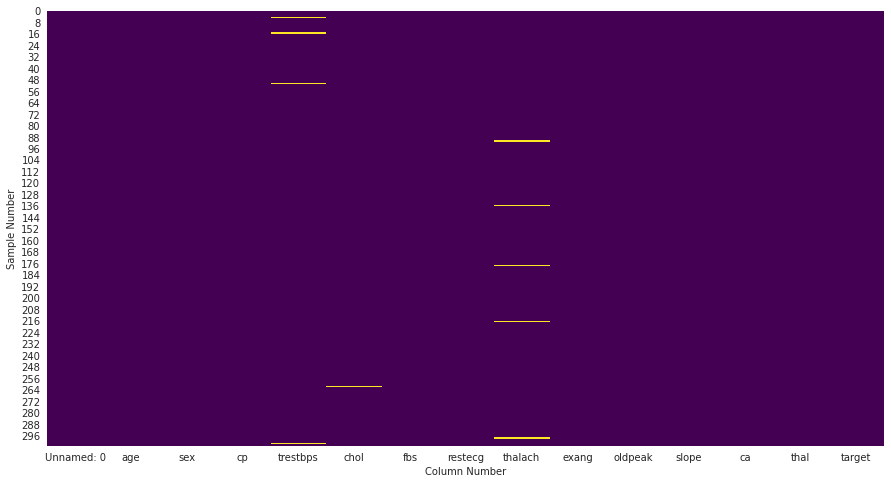

In [ ]:
# MISSING VALUES
df.isna()
df.isna().sum()

plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

In [ ]:
# drop any col that is more than 15% empty
df = df.dropna(thresh=df.shape[0] * 0.85,axis=1)
df.shape

(303, 15)

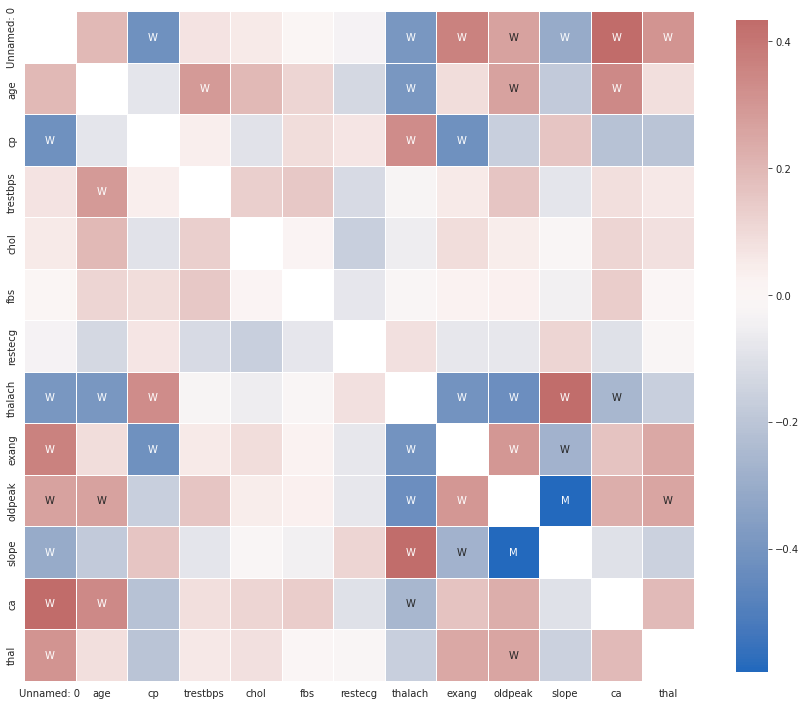

In [ ]:
# Feature Relationships
# Evaluate but remember to consider multicollinearity

# Computes feature correlation
df_corr = df.corr(method="spearman") # pearson assumes a linear relationship... spearman does not

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

<AxesSubplot:xlabel='sex', ylabel='count'>

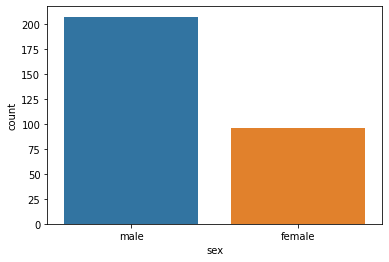

In [ ]:
sns.countplot(x="sex", data=df)

In [ ]:
df['target'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['target'].value_counts()

yes    165
no     138
Name: target, dtype: int64

In [ ]:
df = df[df.target != 0]
df.target.value_counts() 

yes    165
no     138
Name: target, dtype: int64

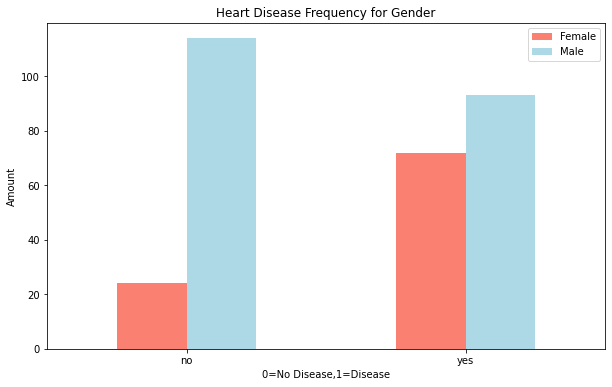

In [ ]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
# REPLACE YOUR TARGET VARIABLE
#plt.figure(figsize=(6, 4))

#sns.histplot(df.target, bins=40, color='black', alpha=1)
#plt.ylabel('sex')
#plt.xlabel('target')
#plt.show()

pd.crosstab(df.target,df.sex).plot(kind="bar", figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0=No Disease,1=Disease");
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);



In [ ]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

unnamed:_0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [ ]:
# Correlation
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

In [ ]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Unnamed: 0,1.000000,0.185153,-0.399163,0.103337,0.021627,0.000743,-0.021130,-0.393974,0.363788,0.298161,-0.276484,0.384962,0.257403
age,0.185153,1.000000,-0.068653,0.279570,0.213465,0.121308,-0.116211,-0.396302,0.096801,0.210013,-0.168814,0.276326,0.068001
cp,-0.399163,-0.068653,1.000000,0.048142,-0.078008,0.094444,0.044421,0.301567,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.103337,0.279570,0.048142,1.000000,0.127278,0.175885,-0.110966,-0.029729,0.070183,0.193827,-0.121380,0.098499,0.060437
chol,0.021627,0.213465,-0.078008,0.127278,1.000000,0.012865,-0.150330,-0.022939,0.066362,0.053098,-0.003027,0.070807,0.098328
fbs,0.000743,0.121308,0.094444,0.175885,0.012865,1.000000,-0.084189,0.001599,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.021130,-0.116211,0.044421,-0.110966,-0.150330,-0.084189,1.000000,0.037393,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.393974,-0.396302,0.301567,-0.029729,-0.022939,0.001599,0.037393,1.000000,-0.396211,-0.346806,0.380764,-0.208967,-0.106621
exang,0.363788,0.096801,-0.394280,0.070183,0.066362,0.025665,-0.070733,-0.396211,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.298161,0.210013,-0.149230,0.193827,0.053098,0.005747,-0.058770,-0.346806,0.288223,1.000000,-0.577537,0.222682,0.210244


<AxesSubplot:>

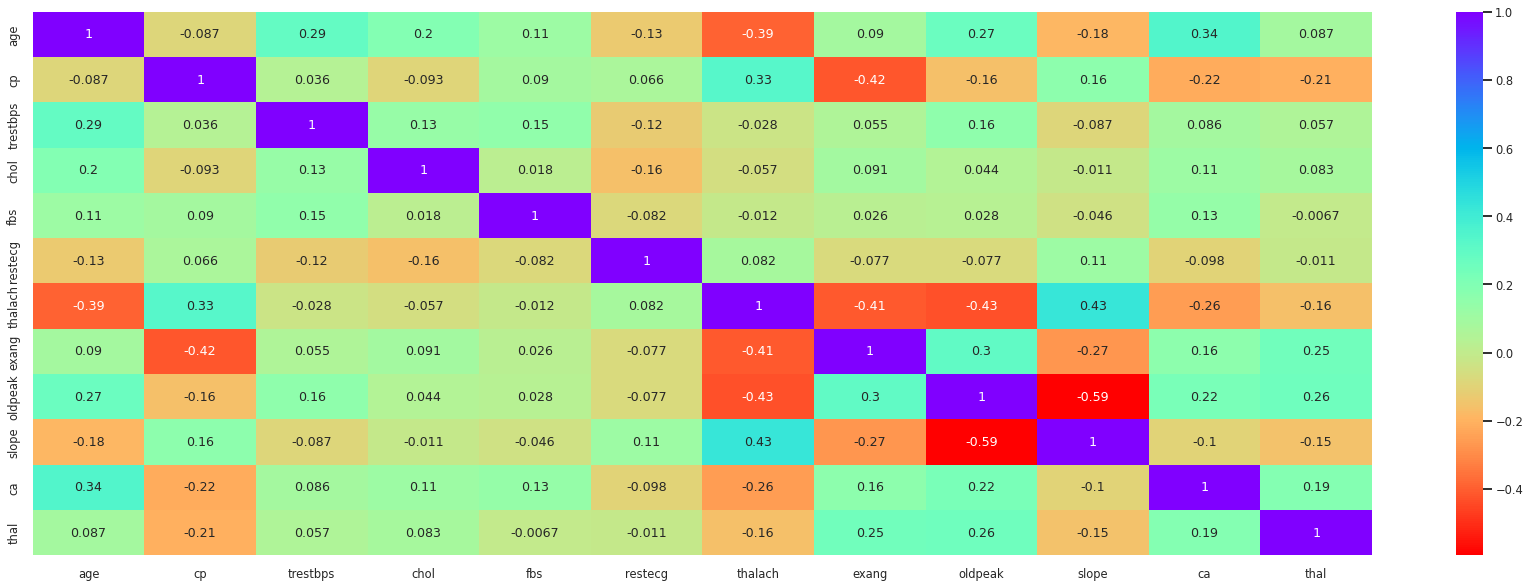

In [ ]:
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)

In [ ]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(242, 61)

(242, 61)

In [ ]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.target).values
y_test = (df_test.target).values
del df_train_full['target']
del df_test['target']

In [ ]:
len(y_train),len(y_test)


(242, 61)

In [ ]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
# IF YOU HAVE CAT values... we need to encode them... pandas get dummies OR dictionary vectorizor OR several other examples... allow us to encode
# this example will work with ANY cat data.
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [ ]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.feature_names_  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

In [ ]:
X_test.shape

(61, 15)

LogisticRegression(solver='liblinear')

LR: 0.987500 (0.019094)
Score for each of the 10 K-fold tests:  [1.         1.         0.95833333 0.95833333 1.         0.95833333
 1.         1.         1.         1.        ]
LogisticRegression(solver='liblinear')
	Training time: 0.008s
	Prediction time: 0.034s



LinearDiscriminantAnalysis()

LDA: 0.987500 (0.026680)
Score for each of the 10 K-fold tests:  [1.         1.         0.91666667 1.         0.95833333 1.
 1.         1.         1.         1.        ]
LinearDiscriminantAnalysis()
	Training time: 0.034s
	Prediction time: 0.056s



KNeighborsClassifier()

KNN: 0.975167 (0.027542)
Score for each of the 10 K-fold tests:  [1.         0.96       0.91666667 0.95833333 1.         0.95833333
 1.         1.         0.95833333 1.        ]
KNeighborsClassifier()
	Training time: 0.005s
	Prediction time: 0.029s



DecisionTreeClassifier()

CART: 0.995833 (0.012500)
Score for each of the 10 K-fold tests:  [1.         1.         1.         1.         1.         0.95833333
 1.         1.         1.         1.        ]
DecisionTreeClassifier()
	Training time: 0.008s
	Prediction time: 0.025s



GaussianNB()

NB: 0.962667 (0.034594)
Score for each of the 10 K-fold tests:  [0.96       1.         0.95833333 0.95833333 0.875      0.95833333
 1.         1.         0.95833333 0.95833333]
GaussianNB()
	Training time: 0.008s
	Prediction time: 0.025s



SVC(gamma='auto')

SVM: 0.529500 (0.093149)
Score for each of the 10 K-fold tests:  [0.4        0.52       0.54166667 0.375      0.5        0.58333333
 0.5        0.70833333 0.625      0.54166667]
SVC(gamma='auto')
	Training time: 0.010s
	Prediction time: 0.066s



Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb39bfe74f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb39bfe7a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb39bfe7220>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb39bfe1070>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb39bfe1340>,
 'means': []}

[Text(1, 0, 'LR'),
 Text(2, 0, 'LDA'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'NB'),
 Text(6, 0, 'SVM')]

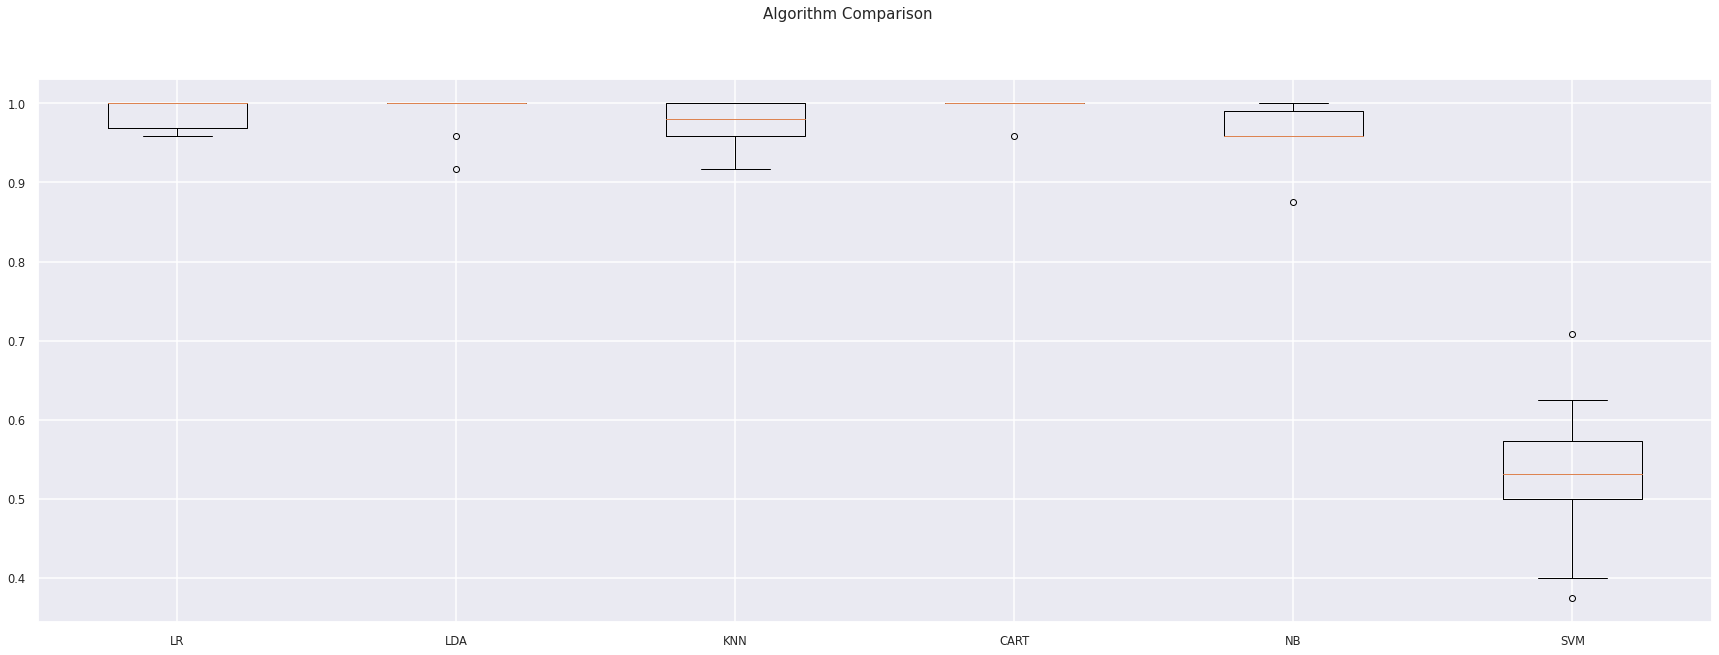

In [ ]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
# scoring = 'roc_auc'
scoring = 'accuracy'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# once you have identified a couple of models... being to drill down and tweak it
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # in this step here... you are training the data to the model... ie:  fitting the data to the model

DecisionTreeClassifier()

In [ ]:
# This will give you the list of Hyperparameters of your model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.feature_names_)
type(dt.feature_importances_)
dv.feature_names_

numpy.ndarray

list

numpy.ndarray

['Unnamed: 0',
 'age',
 'ca',
 'chol',
 'cp',
 'exang',
 'fbs',
 'oldpeak',
 'restecg',
 'sex=female',
 'sex=male',
 'slope',
 'thal',
 'thalach',
 'trestbps']

In [ ]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [ ]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

1.000 Unnamed: 0
0.000 age
0.000 ca
0.000 chol
0.000 cp
0.000 exang
0.000 fbs
0.000 oldpeak
0.000 restecg
0.000 sex=female
0.000 sex=male
0.000 slope
0.000 thal
0.000 thalach
0.000 trestbps


Text(0, 0, '24')

Text(1, 0, '0')

Text(0, 1, '0')

Text(1, 1, '37')

Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'Confusion Matrix')

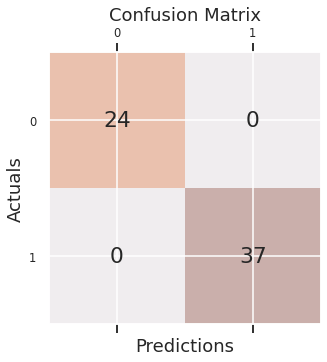

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00        24
         yes       1.00      1.00      1.00        37

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [ ]:
# How to make predictions with BRAND NEW VALUES
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [ ]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert ANY record into a dictionary.
# This is important because when you want to make a prediction - it must be in this format
df_train_full.iloc[[21]]

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
204,204,62,female,0,160.0,164.0,0,0,145.0,0,6.2,0,3,3


In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[213]].to_dict('records')[0]

{'Unnamed: 0': 89,
 'age': 58,
 'sex': 'female',
 'cp': 0,
 'trestbps': 100.0,
 'chol': 248.0,
 'fbs': 0,
 'restecg': 0,
 'thalach': 122.0,
 'exang': 0,
 'oldpeak': 1.0,
 'slope': 1,
 'ca': 0,
 'thal': 2}

In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.head(21).to_dict('records')[0]

{'Unnamed: 0': 95,
 'age': 53,
 'sex': 'male',
 'cp': 0,
 'trestbps': 142.0,
 'chol': 226.0,
 'fbs': 0,
 'restecg': 0,
 'thalach': 111.0,
 'exang': 1,
 'oldpeak': 0.0,
 'slope': 2,
 'ca': 0,
 'thal': 3}

In [ ]:
#item = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[213]].to_dict('records')[0]
actual = y_train[[213]]

In [ ]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [ ]:
# The item to be predicted is passed in. Probability Model 
def model_prediction_proba(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [ ]:
model_prediction(item,dv,dt)

'yes'

In [ ]:
actual

array(['yes'], dtype=object)

In [ ]:
model_prediction_proba(item,dv,dt)

1.0

In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
# This will give you a template that you can manipulate to create predictions with new values
df_train_full.iloc[[2]].to_dict('records')[0]

{'Unnamed: 0': 257,
 'age': 50,
 'sex': 'male',
 'cp': 0,
 'trestbps': 144.0,
 'chol': 200.0,
 'fbs': 0,
 'restecg': 0,
 'thalach': 126.0,
 'exang': 1,
 'oldpeak': 0.9,
 'slope': 1,
 'ca': 0,
 'thal': 3}

In [ ]:
# The list above can be copied into here.  Take everything after a " : " and put it in a [] so you can pass it in as a pd.DF
# create a DataFrame by transforming scalar values to list   (toggle the weekend)

myItem = {'seniority': [1],
 'home': [4],
 'time': [136],
 'age': [19],
 'marital': [1],
 'records': [1],
 'job': [2],
 'expenses': [35],
 'income': [1162.0],
 'assets': [4000.0],
 'debt': [100.0],
 'amount': [400],
 'price': [570]}



In [ ]:
newDF = pd.DataFrame.from_dict(myItem)

In [ ]:
newDF.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,4,136,19,1,1,2,35,1162.0,4000.0,100.0,400,570


In [ ]:
item = newDF.to_dict('records')[0]

In [ ]:
model_prediction(item,dv,dt)

'yes'

In [ ]:
# Hyperparameter Tuning... light...
# Look at the model parameters.   You can tune these.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf': [1, 3],'max_depth': [4,6,8],'min_samples_split': [2,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_    # this will output the best values for the hyperparameters


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=('tree.dot'),
 feature_names=dv.feature_names_,
 class_names=None,
 filled=True,
)

In [ ]:
!pip install pydot
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Tried to use LogisticRegression using Hyperparameter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.9672131147540983

In [ ]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [ ]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[23  1]
 [ 1 36]]


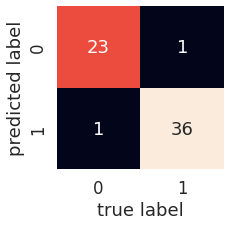

In [ ]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [ ]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.96      0.96      0.96        24
         yes       0.97      0.97      0.97        37

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

